In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from pathlib import Path
from learntools.time_series.style import *  # plot style settings
import statsmodels.api as sm
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv


# Empowering the Future: Navigating Global Sustainability with Data-Driven Insights

## Introduction:

In an era defined by rapid industrialization and urbanization, the pursuit of global sustainability has become an imperative shared by nations and organizations alike. The pressing need to balance economic growth with environmental conservation, particularly in the realm of energy, has ushered in a new era of data-driven decision-making.

Our journey begins with a comprehensive dataset that unfolds the story of sustainable energy worldwide. The data is collected from Kaggle, drawing upon multiple reputable sources, including the World Bank, the International Energy Agency, and ourworldindata.org, amplifying its reliability and relevance. Armed with this wealth of information, we set out to explore critical questions that transcend borders and generations. How can we predict and plan for the world's burgeoning energy needs while safeguarding our planet's health? How can we ensure equitable access to electricity and clean fuels, especially in regions where the lack of infrastructure stifles development?

Our voyage through this dataset is a testament to the power of data and analytics in shaping a sustainable future. In this narrative, we delve into two pivotal aspects of this monumental task:

1. Energy Consumption Prediction: Fueling the Future

As global energy consumption continues to surge, we are faced with the imperative to predict and plan for the future. Through advanced analytics, we unveil the secrets hidden within the data, offering insights into energy usage trends and paving the way for strategic planning. Our journey takes us to the heart of Sustainable Development Goal 7 (SDG 7), where we track progress and chart a course towards accessible, affordable, and clean energy for all.

2. Energy Access Classification: Illuminating the Path

Access to electricity and clean fuels is not just a matter of convenience; it's a gateway to progress. We embark on a mission to categorize regions based on energy access indicators, guiding policymakers to allocate resources where they're needed most. Our dataset paints a vivid picture of sustainable energy's pivotal role in infrastructure development, social equity, and global prosperity.

Join us as we unravel the untold stories buried within the numbers, uncover the trends shaping our future, and gain profound insights into a world where sustainability is not just a goal but a shared responsibility. Welcome to a narrative that celebrates the potential of data to illuminate the path towards a greener, brighter, and more sustainable tomorrow.

## Loading Dataset

In [2]:
df = pd.read_csv('../input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')

In [3]:
df.shape

(3649, 21)

In [4]:
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       6,52,230  33.93911  67.709953  
1          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

## Data Cleaning

In [6]:
missing_values = df.isnull().sum()
missing_values

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

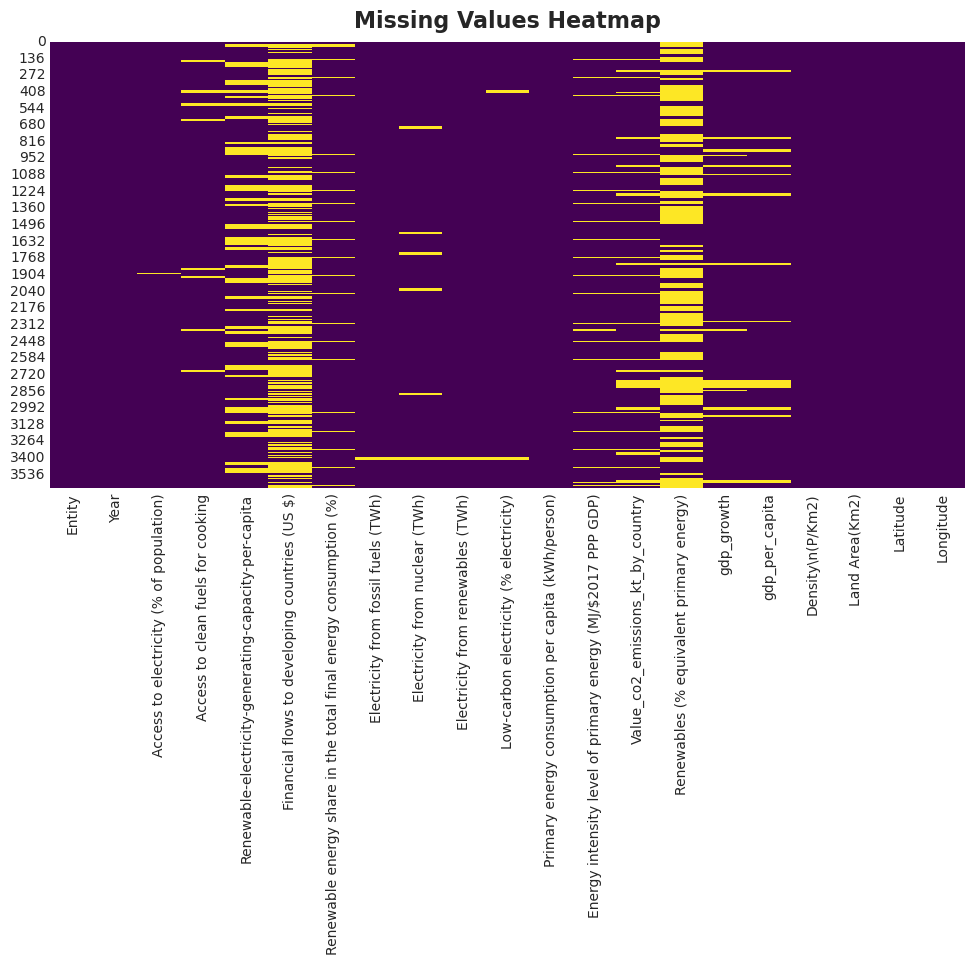

In [7]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Replacing nan with 0
df = df.fillna(0) 

In [9]:
df.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             0.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       0.0    0.000000        0.000000   
1                                       0.0    0.000000        0.000000   
2                                       0.0    0.000000      179.426579   
3                                       0.0    8.832278      190.683814   
4                                       0.0    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       6,52,230  33.93911  67.709953  
1          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3649 non-null   float64
 3   Access to clean fuels for cooking                                 3649 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3649 non-null   float64
 7   Electricity from fossil fuels (TW

In [11]:
# Summary statistics
summary_stats = df.describe()
summary_stats

Year  Access to electricity (% of population)  \
count  3649.000000                              3649.000000   
mean   2010.038367                                78.717386   
std       6.054228                                30.514395   
min    2000.000000                                 0.000000   
25%    2005.000000                                58.721474   
50%    2010.000000                                98.264870   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3649.000000   
mean                           60.325678   
std                            40.380261   
min                             0.000000   
25%                            14.600000   
50%                            78.850000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3649.000000      
mean                                           84.271779      
std                                           216.416174      
min                                             0.000000      
25%                                             0.000000      
50%                                             7.890000      
75%                                            67.600000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    3.649000e+03   
mean                                     4.028212e+07   
std                                      2.004093e+08   
min                                      0.000000e+00   
25%                                      0.000000e+00   
50%                                      0.000000e+00   
75%                                      2.070000e+06   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3649.000000                  
mean                                           30.902949                  
std                                            29.996934                  
min                                             0.000000                  
25%                                             4.480000                  
50%                                            20.710000                  
75%                                            52.610000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3649.000000                     3649.000000   
mean                             69.960052                       12.985755   
std                             347.089451                       71.776775   
min                               0.000000                        0.000000   
25%                               0.280000                        0.000000   
50%                               2.940000                        0.000000   
75%                              26.520000                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3649.000000   
mean                           23.830074   
std                           104.145855   
min                             0.000000   
25%                             0.040000   
50%                             1.420000   
75%                             9.560000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3649.000000   
mean                                36.377600   
std                                 34.34192

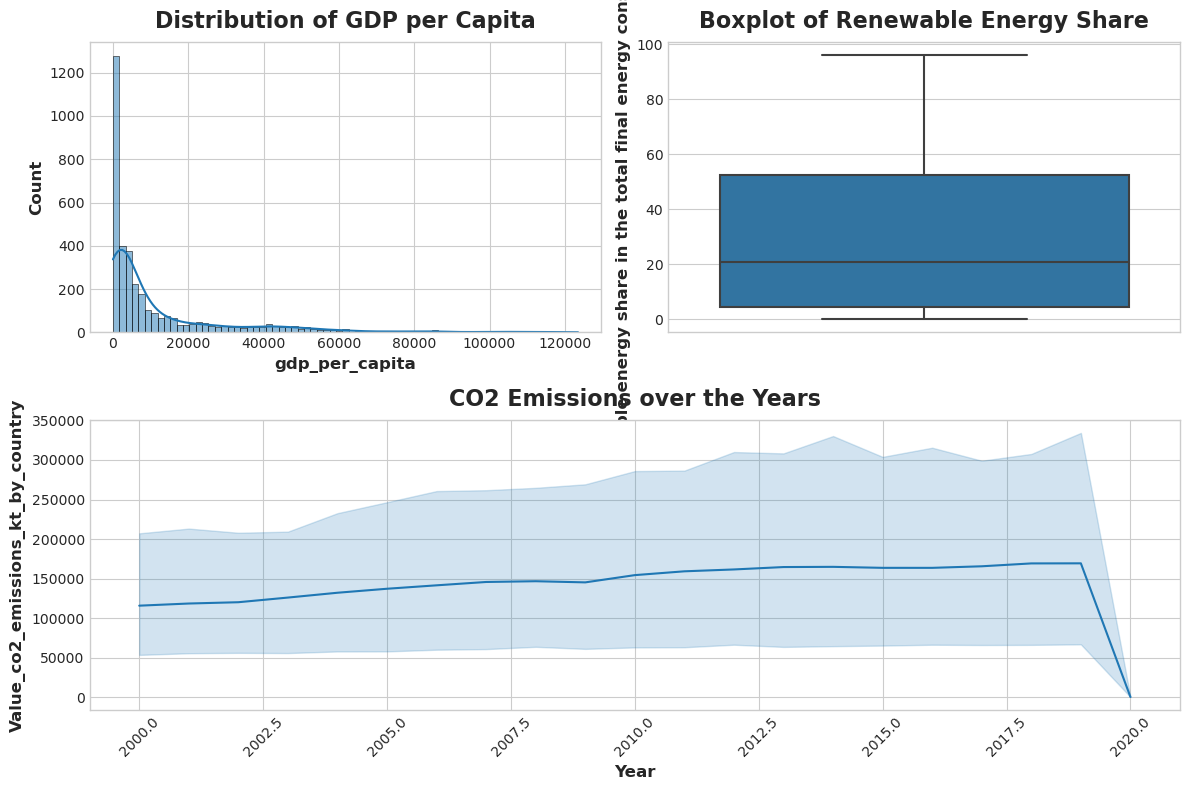

In [12]:
# Visualizing the distribution of key features
plt.figure(figsize=(12, 8))

# Distribution of GDP per capita
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='gdp_per_capita', kde=True)
plt.title('Distribution of GDP per Capita')

# Boxplot of Renewable Energy Share
plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='Renewable energy share in the total final energy consumption (%)')
plt.title('Boxplot of Renewable Energy Share')

# Line plot of CO2 Emissions over the years
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x='Year', y='Value_co2_emissions_kt_by_country')
plt.title('CO2 Emissions over the Years')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In a broader context, it's evident that the majority of countries, or even the global population as a whole, have a GDP per capita below $10,000, highlighting the prevalence of economic challenges in many regions.

Moreover, the boxplot's median line reveals that, on average, the percentage of renewable energy in total final energy consumption falls below the 30% mark. This underscores the significant room for growth in renewable energy adoption to achieve sustainability goals.

Notably, our data reflects a gradual increase in CO2 emissions from the year 2000 to 2020. This concerning trend highlights the urgent need for more aggressive measures to address environmental concerns and reduce our carbon footprint. Achieving a balance between economic growth and environmental sustainability is one of the central challenges of our time.

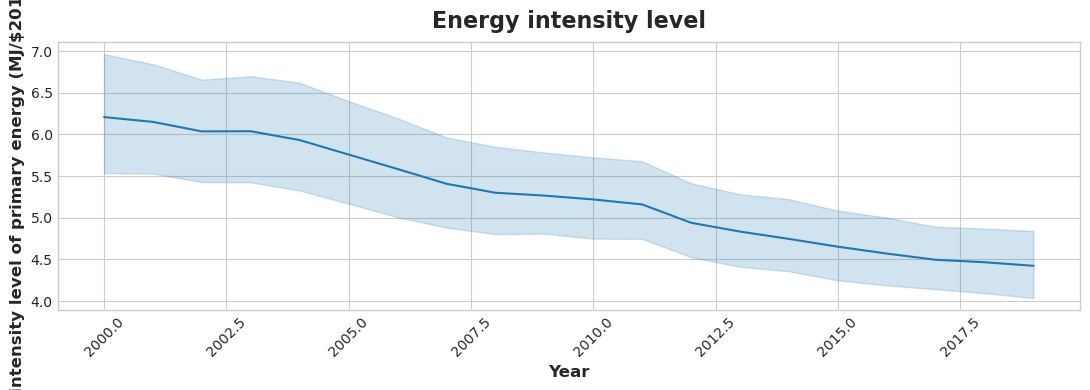

In [13]:
df = df[df['Year'] != 2020]
sns.lineplot(data=df, x='Year', y='Energy intensity level of primary energy (MJ/$2017 PPP GDP)')
plt.title('Energy intensity level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
fig = px.choropleth(
    df,
    locations='Entity',  # Country names
    locationmode='country names',
    color='Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    hover_name='Entity',  # Tooltip text
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose a color scale
    animation_frame='Year',  # Use 'Year' column for animation
    title='Energy intensity level of primary energy (2000-2020)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(geo=dict(showframe=False, projection_scale=2),
                 width=1200,
                 height=600
                 )

fig.show()

Overall decline in Energy intensity level of primary energy, meaning most countries are beginning to efficiently make use of energy and have managed to decouple economic growth from carbon emissions.

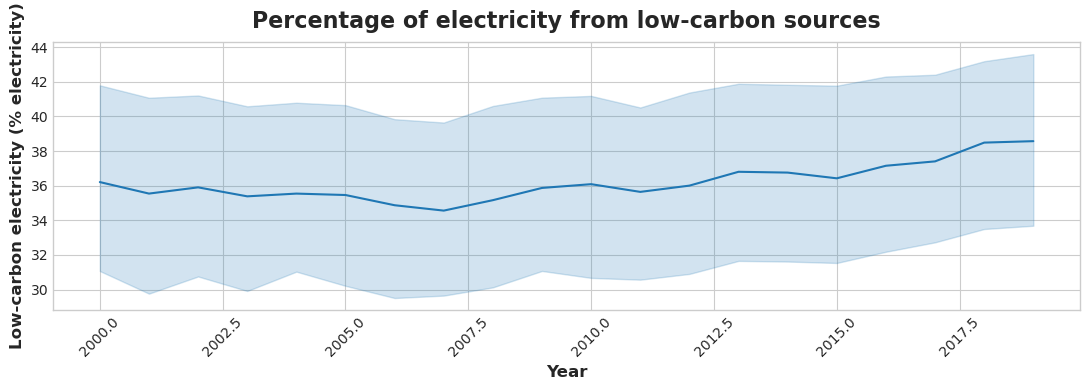

In [15]:

sns.lineplot(data=df, x='Year', y='Low-carbon electricity (% electricity)')
plt.title('Percentage of electricity from low-carbon sources')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The gradual upward trend in the percentage of low-carbon electricity sources is an indication that, on average, many countries are still reliant on high-carbon sources for generating electricity. This trend signals the ongoing challenges in transitioning to cleaner and more sustainable energy generation methods, emphasizing the importance of accelerating the shift to low-carbon alternatives to mitigate the environmental impact of high-carbon sources.

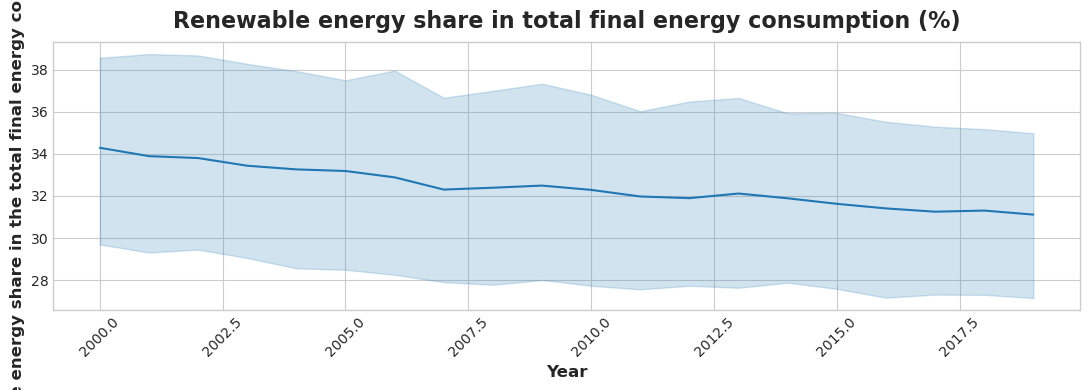

In [16]:
sns.lineplot(data=df, x='Year', y='Renewable energy share in the total final energy consumption (%)')
plt.title('Renewable energy share in total final energy consumption (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

There's a concerning trend where the percentage of renewable energy in the energy mix is on a declining path. This underscores the need for a fundamental shift towards greater adoption of clean and sustainable energy sources to counterbalance the growing energy demand while reducing our environmental footprint.

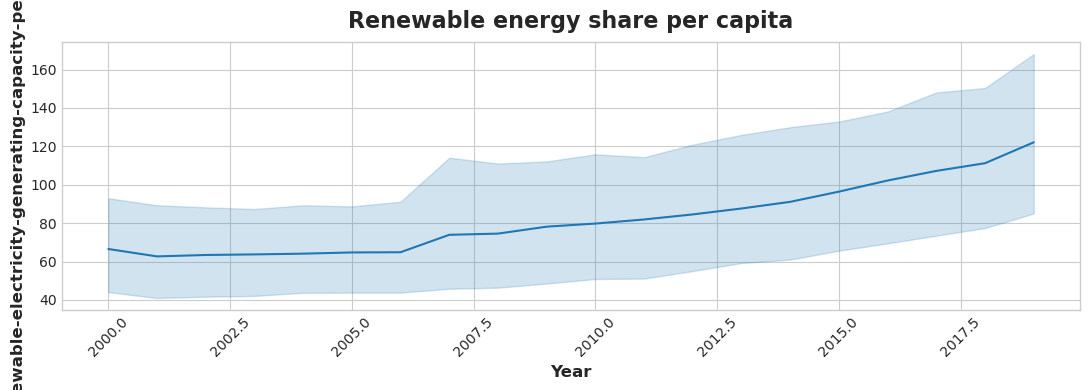

In [17]:
sns.lineplot(data=df, x='Year', y='Renewable-electricity-generating-capacity-per-capita')
plt.title('Renewable energy share per capita')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The increase in renewable energy share per capita suggests a positive trend where more individuals and communities are installing and utilizing renewable energy sources over the years. This reflects a growing awareness and commitment to sustainable energy practices, paving the way for a cleaner and more environmentally responsible future.

In [18]:
fig = px.choropleth(
    df,
    locations='Entity',  # Country names
    locationmode='country names',
    color='Value_co2_emissions_kt_by_country',
    hover_name='Entity',  # Tooltip text
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose a color scale
    animation_frame='Year',  # Use 'Year' column for animation
    title='Carbon dioxide emissions per person in metric tons'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(geo=dict(showframe=False, projection_scale=2),
                 width=1100,
                 height=600
                 )

fig.show()

In [19]:
fig = px.choropleth(
    df,
    locations='Entity',
    locationmode='country names',
    color='Low-carbon electricity (% electricity)',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame='Year',
    title='Percentage of electricity from low-carbon sources'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(geo=dict(showframe=False, projection_scale=2),
                 width=1100,
                 height=600
                 )

fig.show()

There has been an overall increase in CO2 emissions, with China and the United States taking the top spots in terms of emissions. However, it's noteworthy that the United States has shown a decline in CO2 emissions over the specified period, while emissions in China have remained relatively stable. This dynamic highlights the changing landscape of carbon emissions on the global stage, with variations in emission trends between these two major economies.

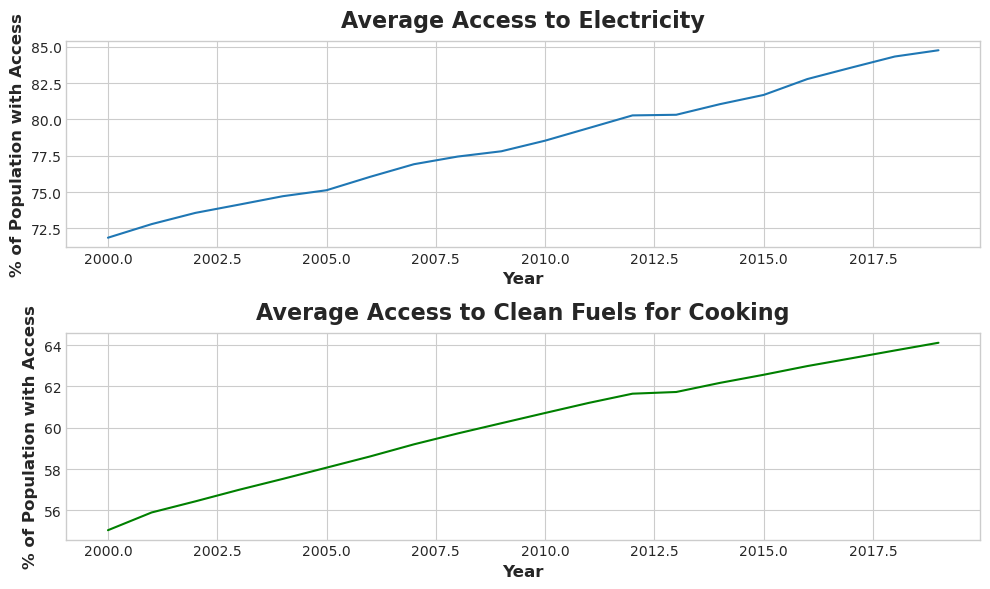

In [20]:
# Filter columns of interest
electricity_access = df[['Entity', 'Year', 'Access to electricity (% of population)']]
clean_fuel_access = df[['Entity', 'Year', 'Access to clean fuels for cooking']]

# Group by Entity (country) and calculate average access percentage for each country
electricity_access_avg = electricity_access.groupby('Year')['Access to electricity (% of population)'].mean()
clean_fuel_access_avg = clean_fuel_access.groupby('Year')['Access to clean fuels for cooking'].mean()

plt.figure(figsize=(10, 6))

# Plot electricity access
plt.subplot(2, 1, 1)
electricity_access_avg.plot(kind='line')
plt.title('Average Access to Electricity')
plt.ylabel('% of Population with Access')

# Plot clean fuel access
plt.subplot(2, 1, 2)
clean_fuel_access_avg.plot(kind='line', color='green')
plt.title('Average Access to Clean Fuels for Cooking')
plt.ylabel('% of Population with Access')

plt.tight_layout()
plt.show()

In [21]:
fig = px.choropleth(
    df,
    locations='Entity',  
    locationmode='country names',
    color='Access to electricity (% of population)',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma, 
    animation_frame='Year', 
    title='Access to Electricity by Country (2000-2020)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(geo=dict(showframe=False, projection_scale=2),
                 width=1000,
                 height=600
                 )

fig.show()

We observe a consistent upward trend in both the overall average access to electricity and access to clean fuels for cooking. While there is an overall progress in electricity access, it's noteworthy that certain countries have made significant advancements in this regard. Countries such as Afghanistan, Cambodia, Morocco, Mongolia, Nepal, Yemen, and Ghana stand out for their remarkable strides in improving access to electricity. These commendable efforts underline the importance of targeted initiatives to ensure that more regions and communities enjoy the benefits of reliable electricity and clean cooking fuels.

In [22]:
fig = px.choropleth(
    df,
    locations='Entity',
    locationmode='country names',
    color='Access to clean fuels for cooking',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame='Year',
    title='Access to Clean Fuels for Cooking by Country (2000-2020)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(
    geo=dict(showframe=False, projection_scale=5),
    width=1000, 
    height=600
)

fig.show()


We observe an overall increase in access to clean fuels for cooking, signifying a positive global trend towards cleaner and safer cooking solutions. However, it's important to note that some countries in Africa have experienced little to no increase in access to clean cooking fuels. These disparities highlight the need for targeted interventions and investments to ensure that all communities, regardless of their location, have access to cleaner and more sustainable cooking options, improving both health and environmental outcomes

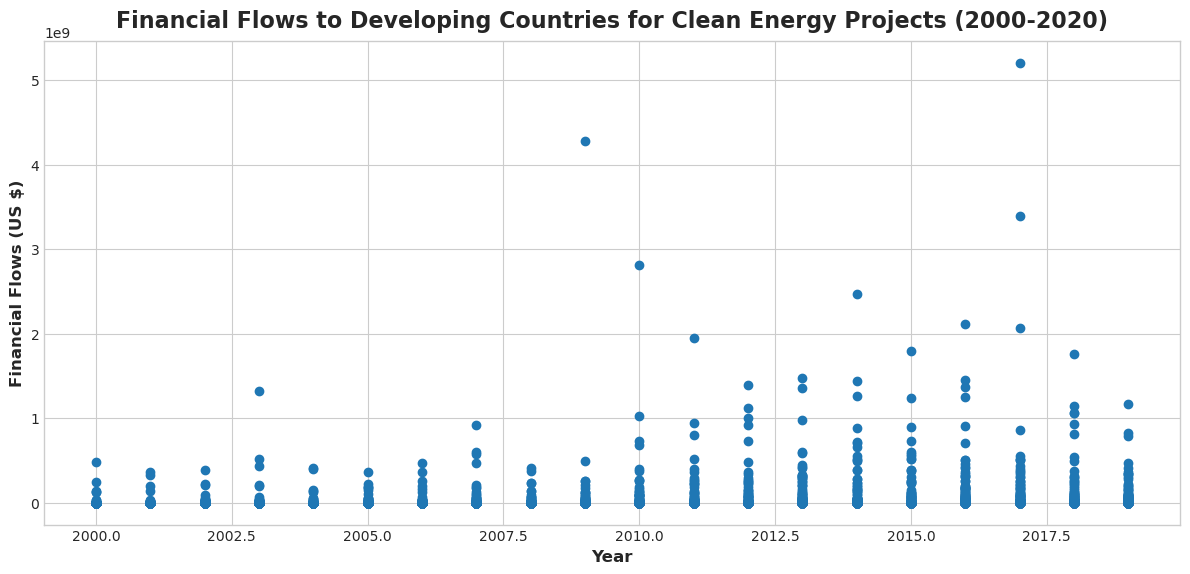

In [23]:
financial_flows = df[['Entity', 'Year', 'Financial flows to developing countries (US $)']]

# Create a time series chart
plt.figure(figsize=(12, 6))
plt.plot(financial_flows['Year'], financial_flows['Financial flows to developing countries (US $)'], marker='o', linestyle=' ')
plt.xlabel('Year')
plt.ylabel('Financial Flows (US $)')
plt.title('Financial Flows to Developing Countries for Clean Energy Projects (2000-2020)')
plt.grid(True)
plt.show()

In [24]:
financial_flows_data = df[['Entity','Year', 'Financial flows to developing countries (US $)']]

financial_flows_data = financial_flows_data[financial_flows_data['Financial flows to developing countries (US $)'] != 0]
print(financial_flows_data.head())

        Entity  Year  Financial flows to developing countries (US $)
0  Afghanistan  2000                                         20000.0
1  Afghanistan  2001                                        130000.0
2  Afghanistan  2002                                       3950000.0
3  Afghanistan  2003                                      25970000.0
5  Afghanistan  2005                                       9830000.0


In [25]:
fig = px.choropleth(
    financial_flows_data,
    locations='Entity', 
    locationmode='country names',
    color='Financial flows to developing countries (US $)',
    hover_name='Entity',
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame='Year',
    title='Financial Flows to Developing Countries by Entity'
)

fig.update_geos(
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

fig.update_layout(
    geo=dict(showframe=False),
    width=1200, 
    height=700  
)

fig.show()


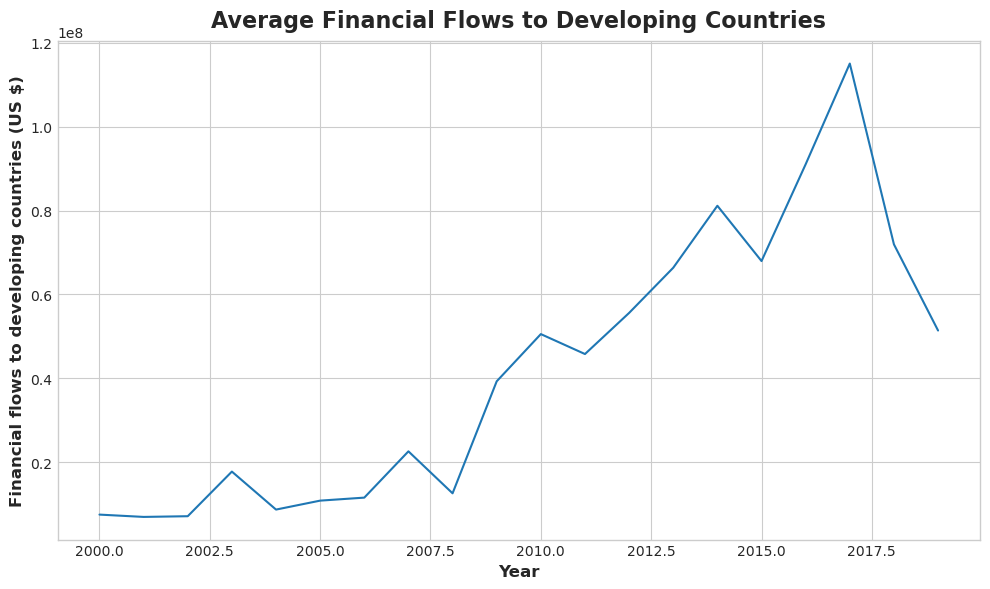

In [26]:
financial_flows = df[['Entity', 'Year', 'Financial flows to developing countries (US $)']]

financial_flows = financial_flows[financial_flows['Year'] != 2020]

financial_flows_avg = financial_flows.groupby('Year')['Financial flows to developing countries (US $)'].mean()

plt.figure(figsize=(10, 6))

financial_flows_avg.plot(kind='line')
plt.title('Average Financial Flows to Developing Countries')
plt.ylabel('Financial flows to developing countries (US $)')

plt.tight_layout()
plt.show()

We observe an overall average increase in financial support from developed countries for clean energy projects from the year 2000. However, it's crucial to note that this upward trajectory is followed by a sharp decline after 2016. This shift in financial flows emphasizes the need for sustained and consistent support from developed nations to drive clean energy projects and meet the global sustainability goals effectively.

# Comparative Analysis by Country

### Access to Electricity by Country

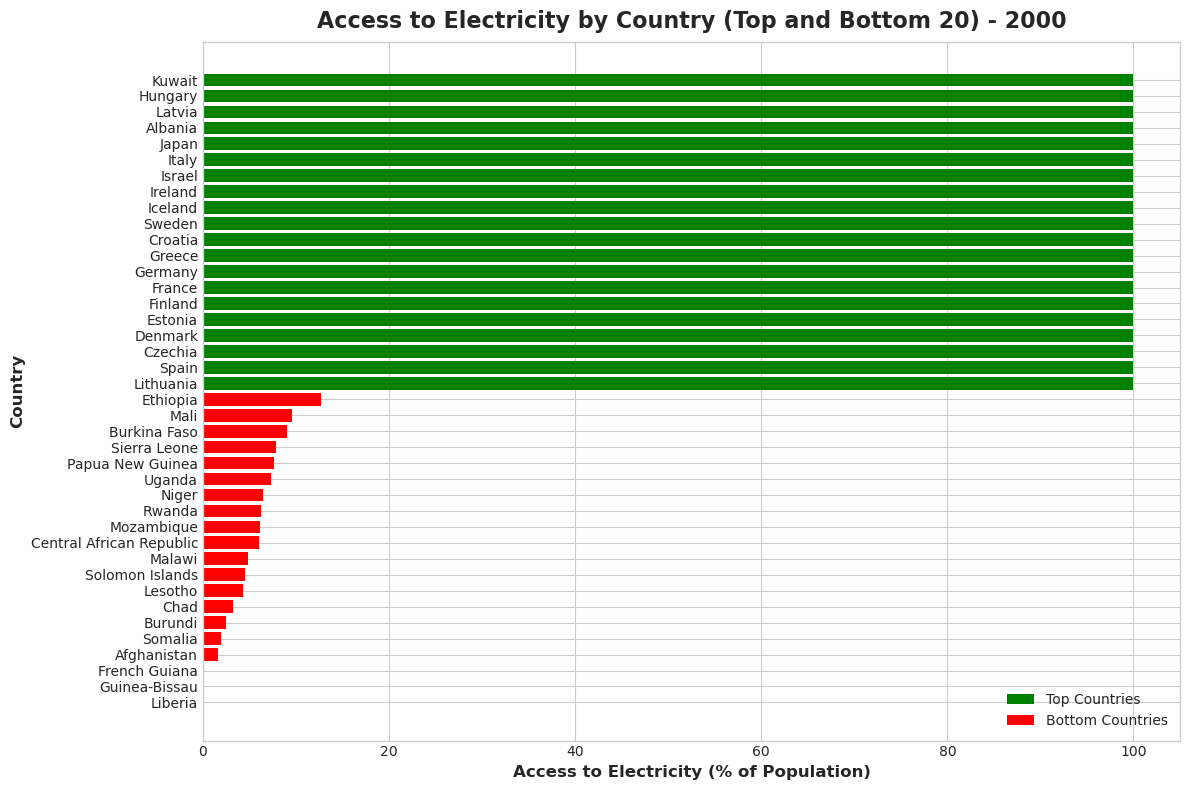

In [27]:
electricity_access_data = df[['Entity', 'Year', 'Access to electricity (% of population)']]

latest_electricity_access = electricity_access_data[electricity_access_data['Year'] == 2000]

# Sort the data by access percentage in descending order
latest_electricity_access = latest_electricity_access.sort_values(by='Access to electricity (% of population)', ascending=False)

# Select the top N and bottom N countries
N = 20  # You can adjust N to show more or fewer countries
top_countries = latest_electricity_access.head(N)
bottom_countries = latest_electricity_access.tail(N)

plt.figure(figsize=(12, 8))
plt.barh(top_countries['Entity'], top_countries['Access to electricity (% of population)'], color='green', label='Top Countries')
plt.barh(bottom_countries['Entity'], bottom_countries['Access to electricity (% of population)'], color='red', label='Bottom Countries')
plt.xlabel('Access to Electricity (% of Population)')
plt.ylabel('Country')
plt.title('Access to Electricity by Country (Top and Bottom 20) - 2000')
plt.legend(loc='lower right')

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [28]:
electricity_access_data = df[['Entity', 'Year', 'Access to electricity (% of population)']]

fig = px.bar(
    electricity_access_data,
    x='Entity',
    y='Access to electricity (% of population)',
    animation_frame='Year', 
    animation_group='Entity', 
    range_y=[0, 100],
    title='Access to Electricity by Country Over the Years',
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Access to Electricity (% of Population)',
    xaxis={'categoryorder': 'total descending'}, 
    showlegend=False, 
)

fig.show()


### Financial flow and GDP

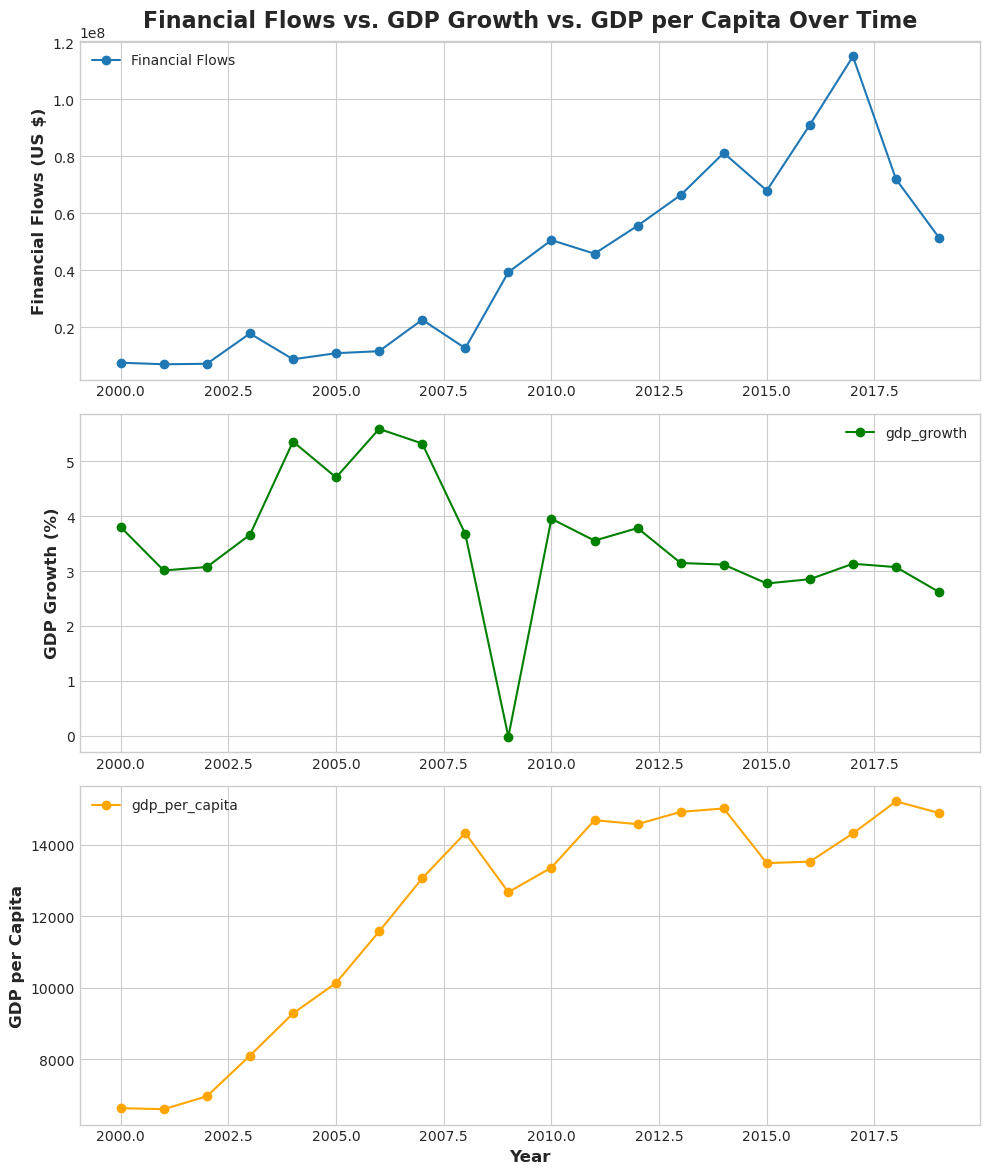

In [29]:
relevant_columns = ['Year', 'Financial flows to developing countries (US $)', 'gdp_growth', 'gdp_per_capita']
selected_data = df[relevant_columns]

grouped_data = selected_data.groupby('Year').mean().reset_index()

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

axes[0].plot(grouped_data['Year'], grouped_data['Financial flows to developing countries (US $)'], label='Financial Flows', marker='o')
axes[0].set_ylabel('Financial Flows (US $)')
axes[0].set_title('Financial Flows vs. GDP Growth vs. GDP per Capita Over Time')
axes[0].legend()

# Plot GDP growth
axes[1].plot(grouped_data['Year'], grouped_data['gdp_growth'], label='gdp_growth', marker='o', color='green')
axes[1].set_ylabel('GDP Growth (%)')
axes[1].legend()

# Plot GDP per capita
axes[2].plot(grouped_data['Year'], grouped_data['gdp_per_capita'], label='gdp_per_capita', marker='o', color='orange')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('GDP per Capita')
axes[2].legend()

plt.tight_layout()

plt.show()

From the data, it's evident that financial flows have a positive correlation with an increase in GDP per capita. However, it's notable that these financial inflows do not significantly impact GDP growth. This observation underscores the complex relationship between financial support for clean energy projects and the broader economic growth, indicating that other factors may play a more influential role in driving GDP growth

# Global Energy Consumption Patterns

In [30]:
fig = px.choropleth(
    df,
    locations='Entity', 
    locationmode='country names',
    color='Electricity from fossil fuels (TWh)',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma, 
    animation_frame='Year',
    title='Electricity from fossil fuels (TWh)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

# Increase the figure size
fig.update_layout(
    geo=dict(showframe=False, projection_scale=5),
    width=1000, 
    height=600  
)

fig.show()

In [31]:
fig = px.choropleth(
    df,
    locations='Entity',
    locationmode='country names',
    color='Electricity from renewables (TWh)',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame='Year', 
    title='Electricity from renewables (TWh)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

# Increase the figure size
fig.update_layout(
    geo=dict(showframe=False, projection_scale=5),
    width=1000, 
    height=600  
)

fig.show()

In [32]:
fig = px.choropleth(
    df,
    locations='Entity',
    locationmode='country names',
    color='Low-carbon electricity (% electricity)',
    hover_name='Entity', 
    color_continuous_scale=px.colors.sequential.Plasma, 
    animation_frame='Year', 
    title='Low-carbon electricity (% electricity)'
)

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="Black",
    showland=True, landcolor="white",
    showocean=True, oceancolor="lightblue",
    showframe=False,
)

# Increase the figure size
fig.update_layout(
    geo=dict(showframe=False, projection_scale=5),
    width=1000, 
    height=600  
)

fig.show()



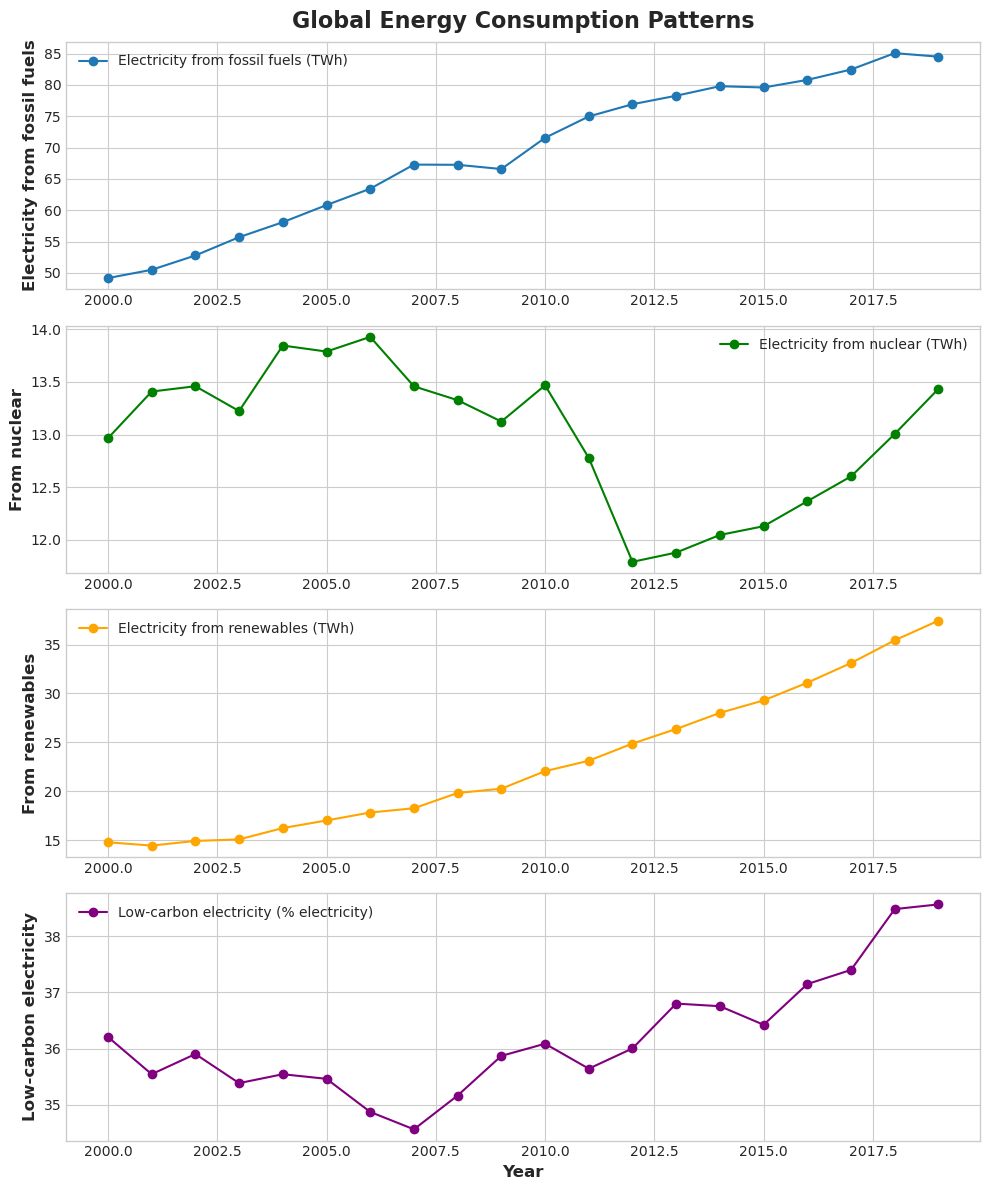

In [33]:
consumptions = ['Year', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)']
energy_consumptions = df[consumptions]

grouped_data1 = energy_consumptions.groupby('Year').mean().reset_index()

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

# Plot 'Electricity from fossil fuels (TWh)'
axes[0].plot(grouped_data1['Year'], grouped_data1['Electricity from fossil fuels (TWh)'], label='Electricity from fossil fuels (TWh)', marker='o')
axes[0].set_ylabel('Electricity from fossil fuels')
axes[0].set_title('Global Energy Consumption Patterns')
axes[0].legend()

# Plot Electricity from nuclear (TWh)'
axes[1].plot(grouped_data['Year'], grouped_data1['Electricity from nuclear (TWh)'], label='Electricity from nuclear (TWh)', marker='o', color='green')
axes[1].set_ylabel('From nuclear')
axes[1].legend()

# Plot Electricity from renewables (TWh)
axes[2].plot(grouped_data['Year'], grouped_data1['Electricity from renewables (TWh)'], label='Electricity from renewables (TWh)', marker='o', color='orange')
axes[2].set_ylabel('From renewables')
axes[2].legend()

# Plot Low-carbon electricity (% electricity)
axes[3].plot(grouped_data['Year'], grouped_data1['Low-carbon electricity (% electricity)'], label='Low-carbon electricity (% electricity)', marker='o', color='purple')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Low-carbon electricity')
axes[3].legend()

plt.tight_layout()

plt.show()



We observe an increasing trend in global energy consumption, transcending the source of energy. It's evident that most countries still heavily rely on fossil fuels, even though renewable energy sources are gaining traction, particularly in developed nations. As we've seen, the upward trajectory in average access to electricity and clean fuels reinforces the rationale behind the global increase in energy consumption. This trend reflects the intertwined relationship between access to sustainable energy and the rising demand for energy resources in an ever-evolving world.

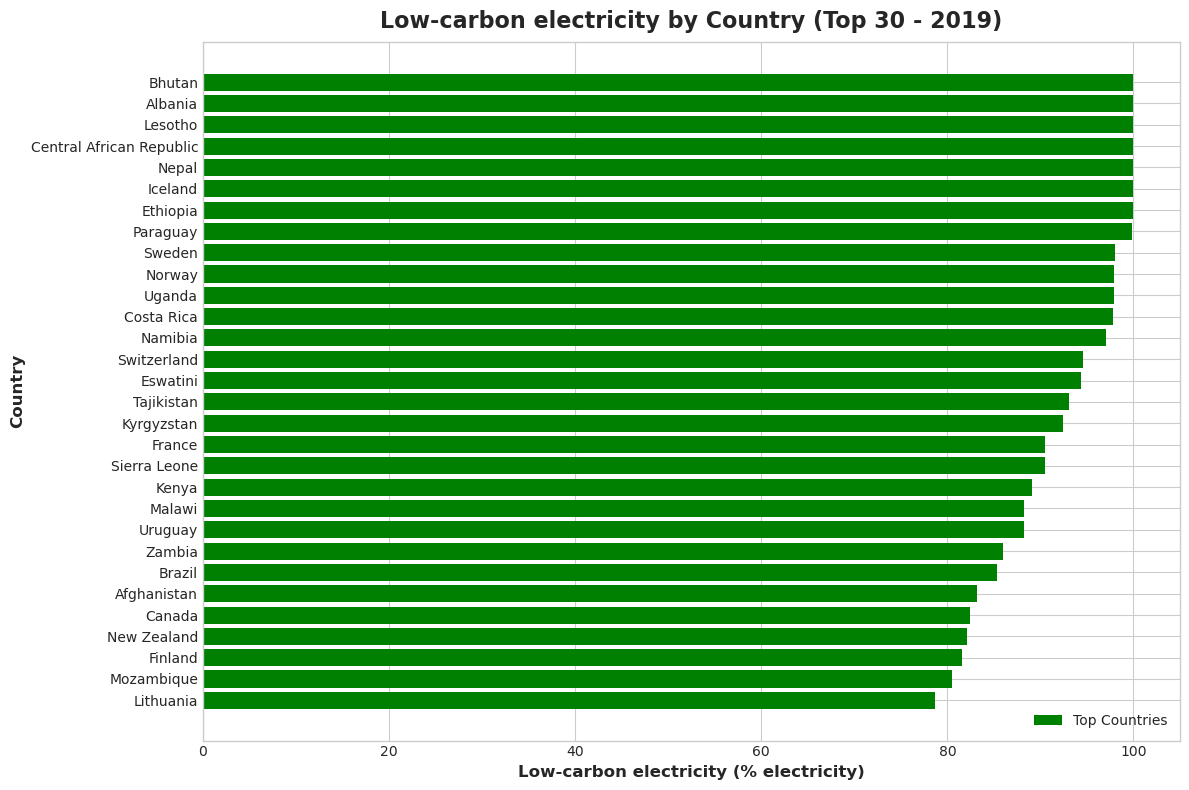

In [34]:
low_carbon_data = df[['Entity', 'Year', 'Low-carbon electricity (% electricity)']]

low_carbon_country = low_carbon_data[low_carbon_data['Year'] == 2019]

low_carbon_country = low_carbon_country.sort_values(by='Low-carbon electricity (% electricity)', ascending=False)

# Select the top N and bottom N countries
N = 30  # You can adjust N to show more or fewer countries
top_countries = low_carbon_country.head(N)

plt.figure(figsize=(12, 8))
plt.barh(top_countries['Entity'], top_countries['Low-carbon electricity (% electricity)'], color='green', label='Top Countries')
plt.xlabel('Low-carbon electricity (% electricity)')
plt.ylabel('Country')
plt.title('Low-carbon electricity by Country (Top 30 - 2019)')
plt.legend(loc='lower right')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
low_carbon_data = df[['Entity', 'Year', 'Low-carbon electricity (% electricity)']]

fig = px.bar(
    low_carbon_data,
    x='Entity',
    y='Low-carbon electricity (% electricity)',
    animation_frame='Year',  
    animation_group= 'Entity', 
    range_y=[0, 100], 
    title='Low-carbon electricity (% electricity)',
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Low-carbon electricity (% electricity)',
    xaxis={'categoryorder': 'total descending'}, 
    showlegend=False,
    width=900, 
    height=700 
)

# Show the animated bar chart
fig.show()

### Energy Indicators for Feature engineering

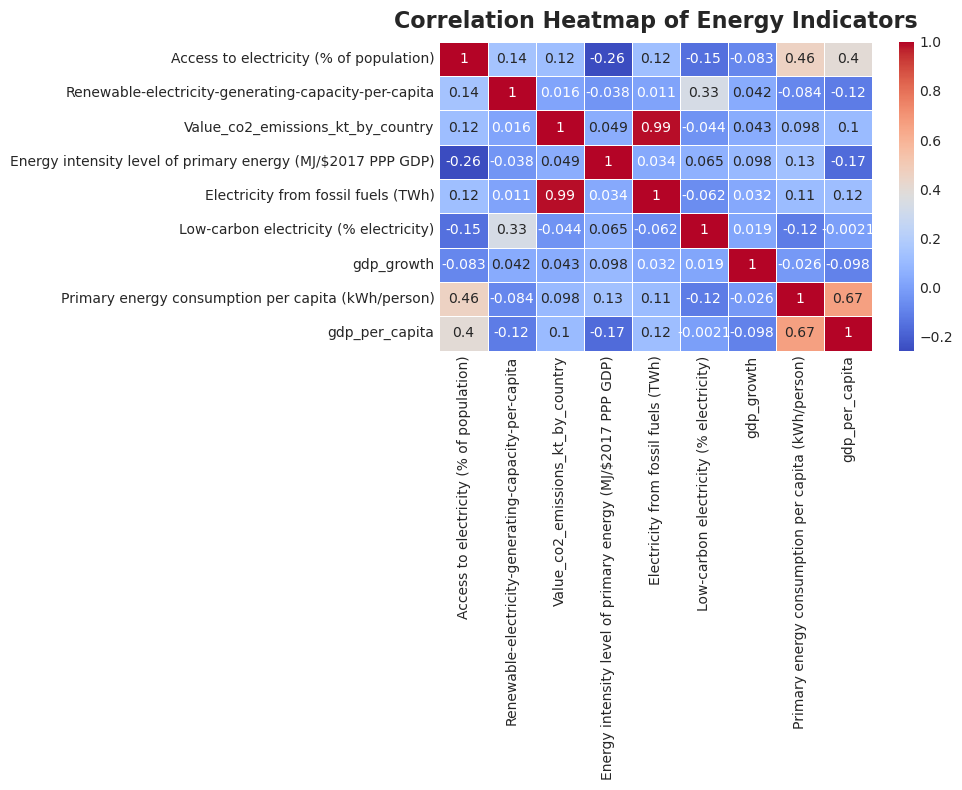

In [36]:
correlation_data = df[['Access to electricity (% of population)', 
                         'Renewable-electricity-generating-capacity-per-capita',
                         'Value_co2_emissions_kt_by_country',
                      'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                      'Electricity from fossil fuels (TWh)', 'Low-carbon electricity (% electricity)',
                      'gdp_growth','Primary energy consumption per capita (kWh/person)', 'gdp_per_capita']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Energy Indicators')
plt.show()


Upon examining the correlation heatmap above, it becomes evident that we observe a slight positive correlation between GDP per capita and primary energy consumption. This correlation hints at the intricate connection between a country's economic prosperity, measured by GDP per capita, and its energy consumption patterns.

In [37]:
selected_data = df[['Year', 'Primary energy consumption per capita (kWh/person)', 'gdp_per_capita']]

# Filter data for the years 2000 to 2020
filtered_data = selected_data[(selected_data['Year'] >= 2000) & (selected_data['Year'] <= 2020)]

fig = px.scatter(
    filtered_data,
    x='Primary energy consumption per capita (kWh/person)',
    y='gdp_per_capita',
    color='Year',
    title='Scatter Plot: Primary Energy Consumption vs. GDP per Capita (2000-2020)',
    labels={'Primary energy consumption per capita (kWh/person)': 'Primary Energy Consumption per Capita (kWh/person)'}
)

# Show the plot
fig.show()


We observe a persistent global trend over the years, indicating a linear relationship: as individuals earn higher incomes, there is a corresponding increase in energy usage. This observation aligns seamlessly with the earlier chart, which vividly illustrates the overall upward trajectory in global energy consumption across various sources, encompassing fossil fuels, nuclear, renewables, and low-carbon electricity.

# Predictive Analysis

### Energy Consumption Forecast

In [38]:
from sklearn.model_selection import train_test_split

X = df[['Year','gdp_per_capita']] 
y = df['Primary energy consumption per capita (kWh/person)'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

### Model Evaluation

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 15252.11
Mean Squared Error: 723411669.01
R-squared: 0.44


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures

# Applying PolynomialFeatures for better fitting
pr = PolynomialFeatures(degree=3)
X_train_pr = pr.fit_transform(X_train[['Year','gdp_per_capita']])
X_test_pr = pr.fit_transform(X_test[['Year','gdp_per_capita']])
pr

PolynomialFeatures(degree=3)

In [42]:
model1 = LinearRegression()
model1.fit(X_train_pr, y_train)

LinearRegression()

In [43]:
yhat_pr = model1.predict(X_test_pr)

mae_pr = mean_absolute_error(y_test, yhat_pr)
mse_pr = mean_squared_error(y_test, yhat_pr)
r2_pr = r2_score(y_test, yhat_pr)

print(f'Mean Absolute Error: {mae_pr:.2f}')
print(f'Mean Squared Error: {mse_pr:.2f}')
print(f'R-squared: {r2_pr:.2f}')

Mean Absolute Error: 13738.64
Mean Squared Error: 607370019.89
R-squared: 0.53


Applying the PolynominalFeatures function improved the accuracy of the model.

#### Prediction

In [44]:
future_data = pd.DataFrame({'Year': [2021, 2022, 2023], 'gdp_per_capita': [55000, 35000, 20000]}) 
future_data_pr = pr.fit_transform(future_data)
future_predictions = model1.predict(future_data_pr)

print("Given a global average GDP per capita of 55000, 35000 and 2000 respectively for each of the following year, the Forecasted Energy Consumption is:")
for year, consumption in zip([2021, 2022, 2023], future_predictions):
    print(f"Year {year}: {consumption:.2f} (kWh/person)")

Given a global average GDP per capita of 55000, 35000 and 2000 respectively for each of the following year, the Forecasted Energy Consumption is:
Year 2021: 73976.53 (kWh/person)
Year 2022: 58317.71 (kWh/person)
Year 2023: 39893.15 (kWh/person)


The overarching trend of increasing global primary energy consumption alongside rising GDP per capita underscores the intrinsic link between economic development and energy demands. To address this challenge while prioritizing sustainability, governments and industries must champion a suite of strategic actions. First and foremost, a paramount strategy is the adoption of energy-efficient technologies and practices across sectors like industry, transportation, and buildings. By prioritizing energy efficiency, nations can curb consumption without stifling economic growth. Furthermore, diversifying energy sources is essential. Investment in a balanced energy mix, combining renewables such as solar, wind, and hydropower with conventional fossil fuels, not only ensures energy security but also aligns with environmental goals by reducing carbon emissions.

A crucial aspect involves the enactment of energy conservation policies and regulations that encourage responsible energy use. This encompasses the implementation of energy-efficient building standards, appliance norms, and industrial efficiency measures. Simultaneously, investments in research and innovation must be made, fostering the development of breakthrough technologies that promote both energy efficiency and cleaner energy production. Widespread public awareness campaigns and education initiatives can instigate voluntary reductions in energy consumption, engaging individuals and businesses alike. Financial incentives and subsidies, especially in the adoption of clean energy technologies, such as solar panels and electric vehicles, can expedite the transition to low-carbon energy sources.

International collaboration is of paramount importance, enabling the exchange of knowledge, technologies, and financial resources for sustainable energy development. Additionally, smart urban planning, compact city designs, and green infrastructure can drastically cut energy demands. The adoption of circular economy principles that reduce waste and enhance resource efficiency is an ecologically responsible move. Finally, policy integration is essential. Energy and environmental policies should be seamlessly integrated into broader economic development strategies, fostering a holistic approach that accounts for the social, economic, and environmental facets of sustainable development. By embracing these multifaceted recommendations, countries can harmonize economic growth with sustainable energy practices, fostering an eco-conscious and energy-efficient future.







### Energy Access Classification

In [45]:
df['Access_Label'] = pd.cut(df['Access to electricity (% of population)'],
                              bins=[0, 30, 70, 100],
                              labels=['Low Access', 'Medium Access', 'High Access'])

# Encoding labels to numerical values
label_mapping = {'Low Access': 0, 'Medium Access': 1, 'High Access': 2}
df['Access_Label'] = df['Access_Label'].map(label_mapping)

To identify the key features influencing access to electricity in a region or country for our model, let's visually explore their impact on electricity access.

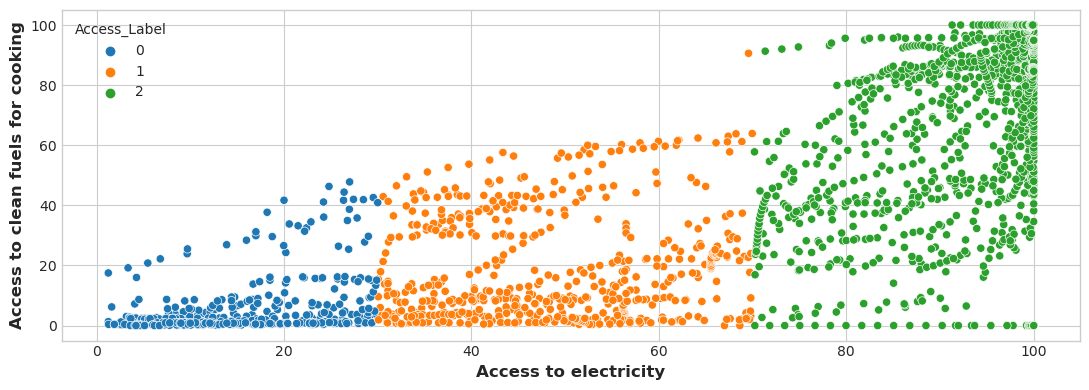

In [46]:
sns.scatterplot(y="Access to clean fuels for cooking", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Access to clean fuels for cooking")
plt.show()

It's evident that there is a clear correlation between the increase in access to clean fuels for cooking and improved access to electricity. Countries with low access to electricity also tend to exhibit lower access to clean fuels, particularly when compared to countries with medium and high levels of electricity access. This observation underscores the interconnected nature of sustainable energy access, where progress in one facet often complements advancements in another, contributing to enhanced living standards and environmental well-being

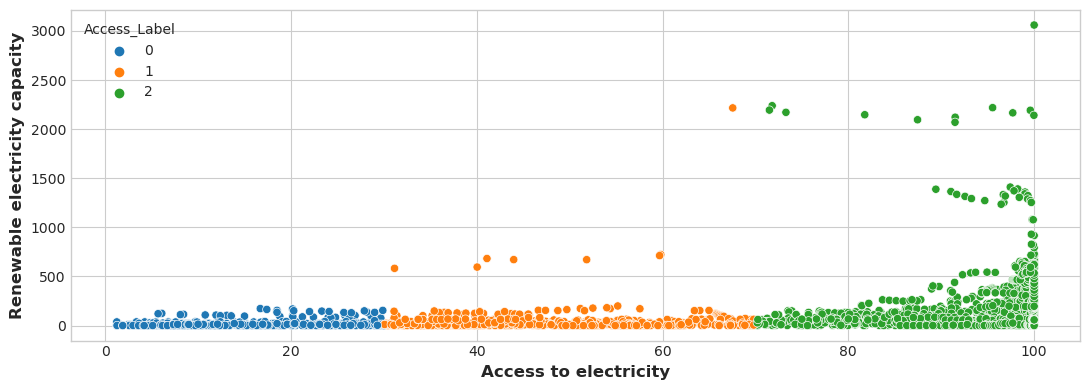

In [47]:
sns.scatterplot(data=df, y="Renewable-electricity-generating-capacity-per-capita", x="Access to electricity (% of population)", hue="Access_Label")
plt.xlabel("Access to electricity")
plt.ylabel("Renewable electricity capacity")
plt.show()

Countries with high access to electricity also tend to boast a higher installed capacity of renewable electricity sources. This correlation highlights the synergy between reliable electricity access and a strong presence of renewable energy infrastructure, showcasing a commitment to clean and sustainable energy practices in these regions

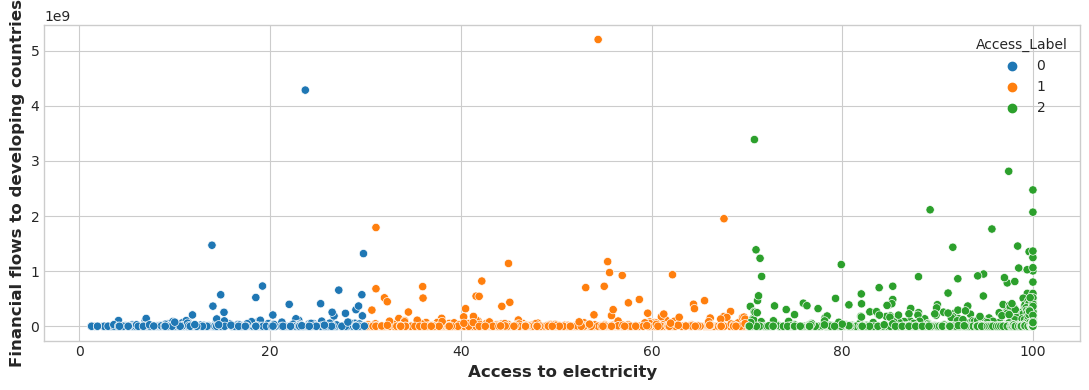

In [48]:
sns.scatterplot(y="Financial flows to developing countries (US $)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Financial flows to developing countries")
plt.show()

Financial flows play a pivotal role in supporting some developing countries, contributing to improved access to electricity. This financial support acts as a catalyst for enhancing infrastructure and electricity accessibility in these regions, marking a positive step towards sustainable energy development.

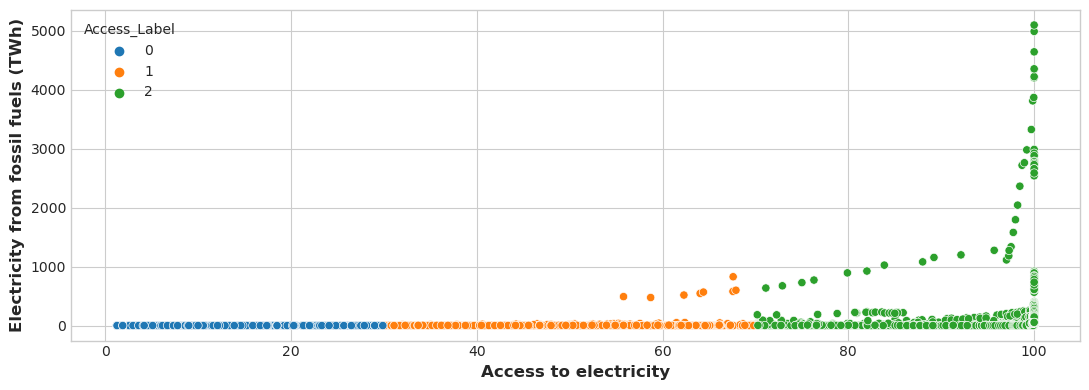

In [49]:
sns.scatterplot(y="Electricity from fossil fuels (TWh)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Electricity from fossil fuels (TWh)")
plt.show()

It's worth noting that even in countries with high access to electricity, fossil fuels remain a dominant source of energy. This underscores the continuing reliance on conventional energy sources, emphasizing the need for a more rapid transition to cleaner and sustainable energy alternatives to mitigate environmental impacts.

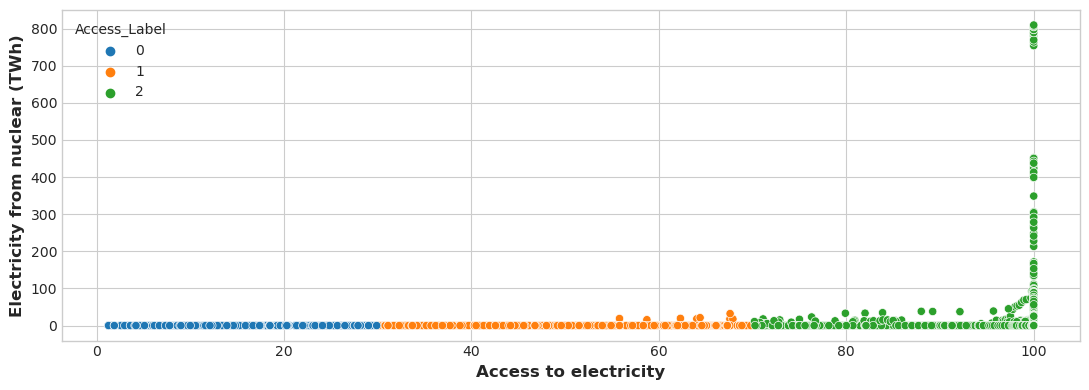

In [50]:
sns.scatterplot(y="Electricity from nuclear (TWh)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Electricity from nuclear (TWh)")
plt.show()

Remarkably, countries with high access to electricity predominantly prioritize nuclear energy as a substantial part of their energy mix. This inclination towards nuclear power highlights their commitment to a diversified and often low-carbon energy strategy, signifying a significant role for nuclear energy in these regions.

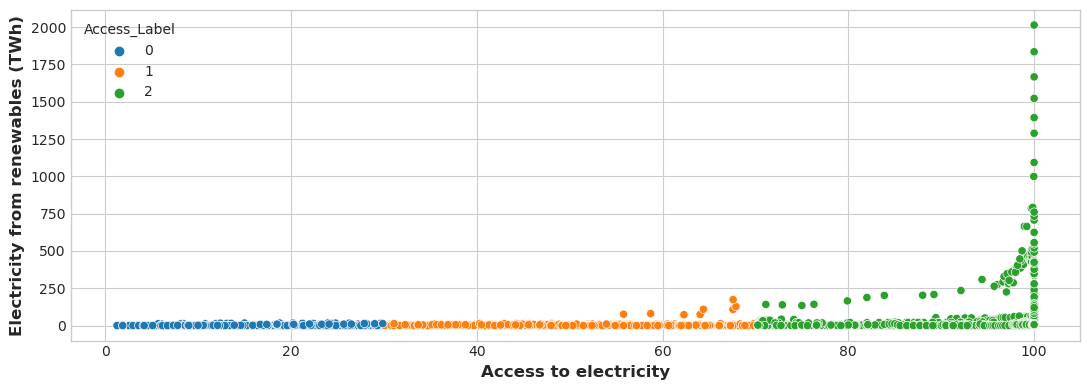

In [51]:
sns.scatterplot(y="Electricity from renewables (TWh)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Electricity from renewables (TWh)")
plt.show()

In countries with high access to electricity, there's a notable prevalence of renewable energy sources. This underscores a proactive approach towards diversifying the energy mix and embracing sustainable energy solutions, furthering the global transition towards clean and environmentally responsible energy generation

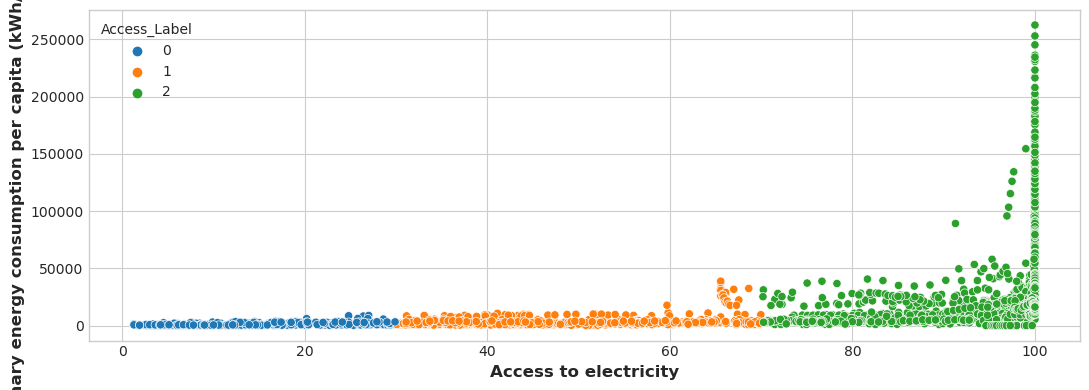

In [52]:
sns.scatterplot(y="Primary energy consumption per capita (kWh/person)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Primary energy consumption per capita (kWh/person)")
plt.show()

In countries with high access to electricity, the consumption level is notably high. This reflects the demand for energy-intensive services and industries in these regions, emphasizing the significant role electricity plays in driving economic activities and improving the quality of life.

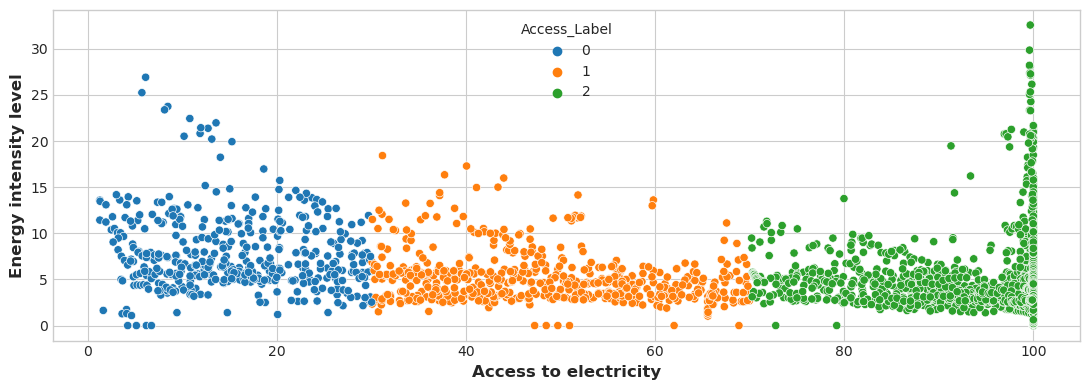

In [53]:
sns.scatterplot(y="Energy intensity level of primary energy (MJ/$2017 PPP GDP)", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Energy intensity level")
plt.show()

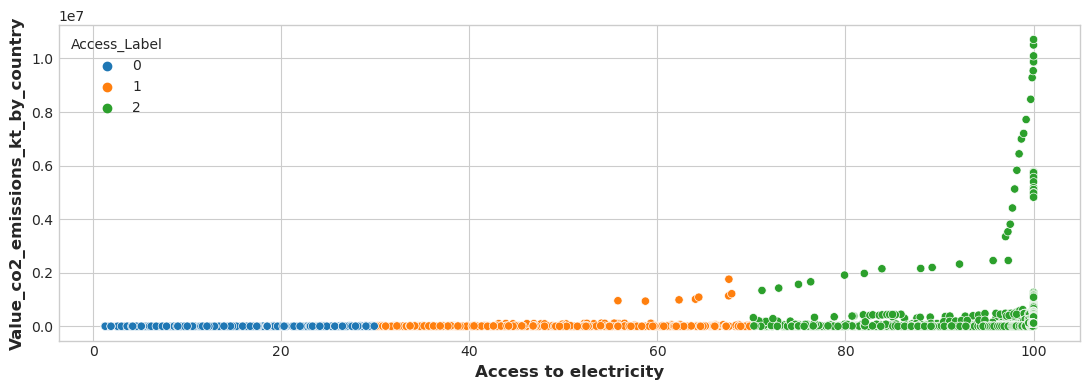

In [54]:
sns.scatterplot(y="Value_co2_emissions_kt_by_country", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("Value_co2_emissions_kt_by_country")
plt.show()

It's apparent that countries with high access to electricity often exhibit higher CO2 emissions. This points to the trade-off between electricity access and environmental sustainability, highlighting the imperative to advance towards cleaner and low-carbon energy sources in these regions.

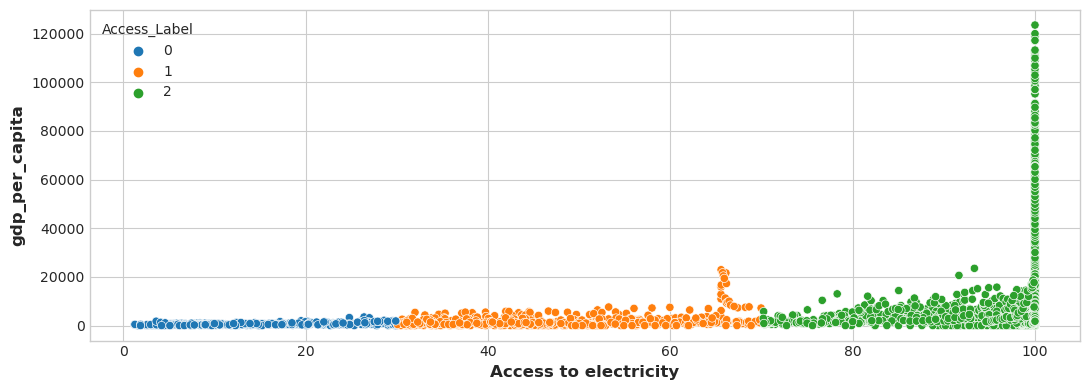

In [55]:
sns.scatterplot(y="gdp_per_capita", x="Access to electricity (% of population)", hue="Access_Label", data=df)
plt.xlabel("Access to electricity")
plt.ylabel("gdp_per_capita")
plt.show()

There is a noticeable correlation where countries with high GDP per capita also tend to have high access to electricity. This linkage underscores the pivotal role that economic prosperity plays in enabling improved access to electricity, leading to enhanced living standards and economic development


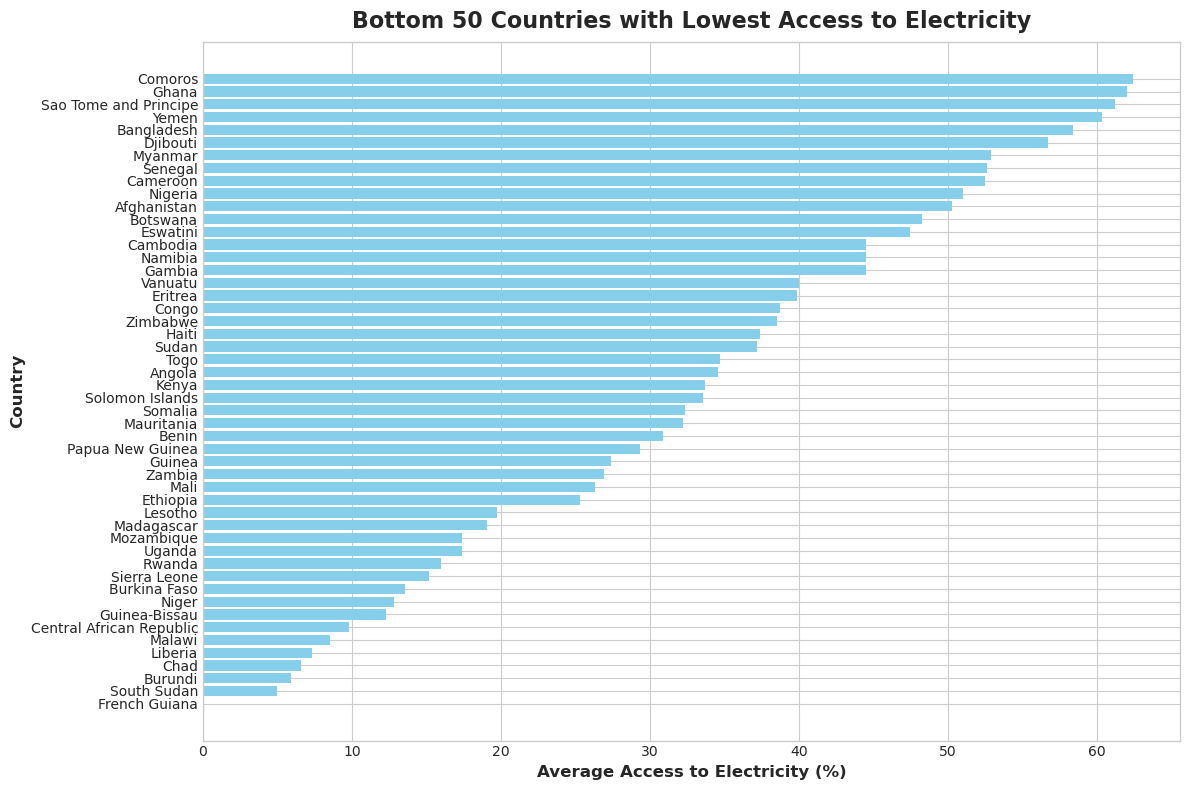

In [56]:
average_access_by_country = df.groupby('Entity')['Access to electricity (% of population)'].mean()
bottom_countries = average_access_by_country.sort_values(ascending=False).tail(50)

plt.figure(figsize=(12, 8))
plt.barh(bottom_countries.index, bottom_countries.values, color='skyblue')
plt.xlabel('Average Access to Electricity (%)')
plt.ylabel('Country')
plt.title('Bottom 50 Countries with Lowest Access to Electricity')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.tight_layout()
plt.show()

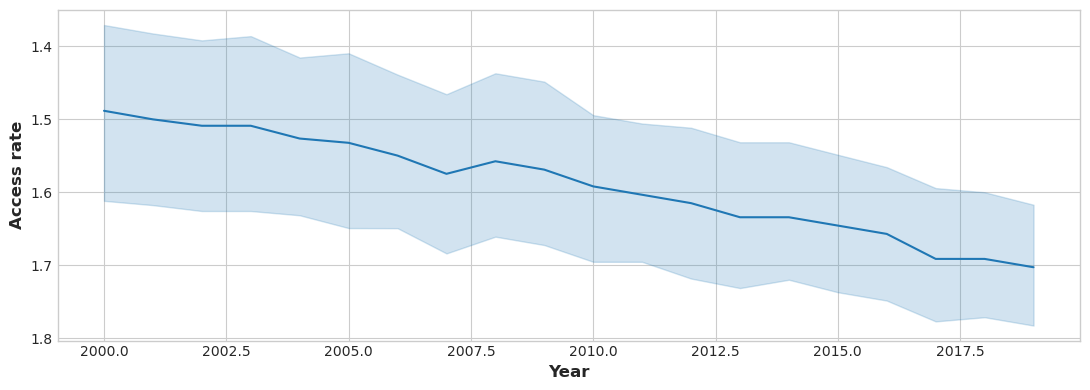

In [57]:
sns.lineplot(data=df, x="Year", y="Access_Label")
plt.xlabel("Year")
plt.ylabel("Access rate")
plt.show()

While the percentage of the global population with access to electricity is increasing due to population growth, the rate of improvement in global electricity access is on a declining trajectory since the year 2000. This trend suggests that while the absolute number of people with access to electricity is rising, the rate of progress in expanding electricity access is diminishing over time

### Features for the classification model

In [58]:
X = df[["Access to clean fuels for cooking",
        "Renewable-electricity-generating-capacity-per-capita","Electricity from fossil fuels (TWh)",
       "Electricity from nuclear (TWh)","Electricity from renewables (TWh)", "Primary energy consumption per capita (kWh/person)",
       "Value_co2_emissions_kt_by_country","gdp_per_capita"]]
y = df['Access_Label'].fillna(0)

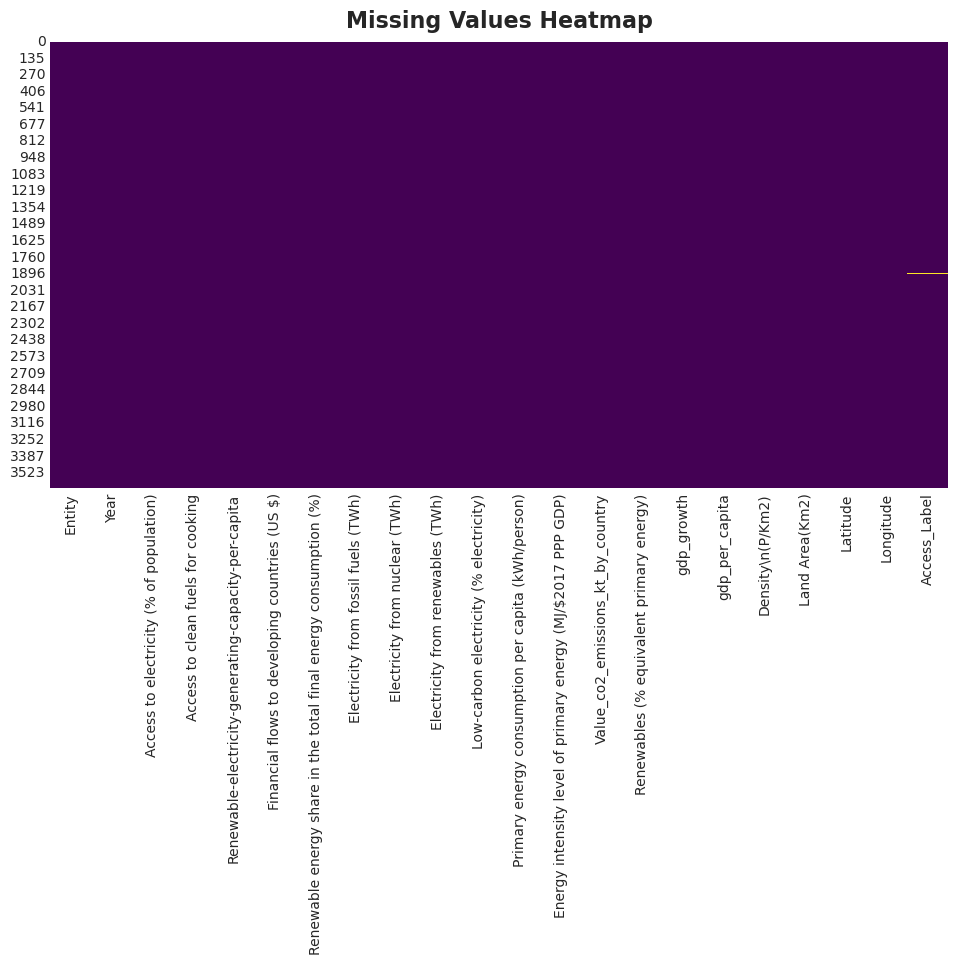

In [59]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [60]:
from sklearn import preprocessing

# Standardizing the X values
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.33394373, -0.34515079, -0.20258228, ..., -0.73099954,
        -0.19767311, -0.63602771],
       [-1.30920283, -0.34685424, -0.20278724, ..., -0.73288116,
        -0.19771332, -0.63602771],
       [-1.28446192, -0.34869964, -0.20267012, ..., -0.7336266 ,
        -0.19731117, -0.62666156],
       ...,
       [-0.75005846, -0.09384539, -0.19412036, ..., -0.65180293,
        -0.18483126, -0.57155026],
       [-0.74758436,  0.00173679, -0.19212932, ..., -0.64109297,
        -0.18209667, -0.57053479],
       [-0.74263618, -0.00361014, -0.19233428, ..., -0.65364598,
        -0.18292777, -0.56729323]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(2779, 8)

#### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)


classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report)



Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.95      0.92      0.93       115
           2       0.99      0.99      0.99       507

    accuracy                           0.98       695
   macro avg       0.95      0.96      0.96       695
weighted avg       0.98      0.98      0.98       695



#### Evaluation with Confusion Matrix

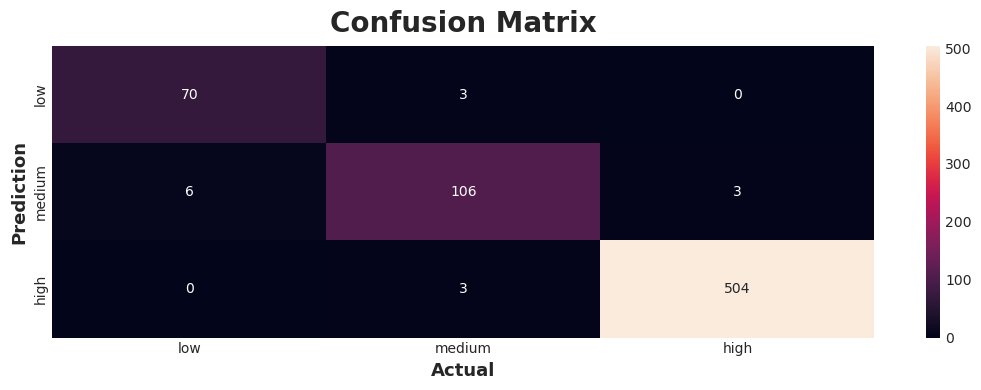

Accuracy: 0.98


In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['low', 'medium', 'high'],
            yticklabels=['low', 'medium', 'high'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


The successful classification of access to electricity with an impressive 98% accuracy using a combination of crucial factors points to the multifaceted nature of achieving high access rates. Access to clean fuels for cooking, renewable electricity capacity per capita, the balance between energy sources (fossil fuels, nuclear, and renewables), primary energy consumption per capita, carbon emissions, and economic prosperity (GDP per capita) are interlinked elements that significantly contribute to a region's access to electricity. Clean fuels for cooking and a strong focus on renewable electricity capacity reflect a commitment to clean and sustainable energy sources. Meanwhile, the balance between various energy sources and efficient primary energy consumption demonstrate an optimal utilization of resources. The positive correlation between GDP per capita and high access suggests that economic development can empower communities with improved infrastructure, facilitating electricity access.

To empower nations and regions for high electricity access, governments and world leaders should prioritize several critical actions. First, investment in infrastructure and clean energy projects is paramount, especially in regions with low access. Sustainable energy initiatives can transform the energy landscape and should be heavily funded. Second, policies that promote renewable energy adoption and the reduction of carbon emissions should be enforced rigorously. Third, fostering economic development through education, job creation, and income growth is vital, as it propels communities toward greater access to electricity. Lastly, global collaboration is key. International support, technology transfer, and partnerships with developed nations can accelerate energy access for regions that require assistance. Ultimately, a holistic approach, considering these factors, can lead nations and regions toward higher electricity access, driving progress and prosperity for all.

## Conclusion

In conclusion, this project has empowered us to unlock valuable insights from extensive data on sustainable energy indicators spanning two decades. We've not only harnessed predictive models to forecast future energy consumption but also achieved high accuracy in classifying countries into low, medium, and high access to electricity categories. These achievements not only facilitate better understanding of sustainable energy trends but also serve as a robust foundation for informed policy decisions and strategic investments. Our efforts contribute to the global mission of cultivating a more sustainable and equitable energy landscape, aligning with the Sustainable Development Goal 7, and ensuring universal access to affordable, reliable, and modern energy services.

Furthermore, this project serves as a stepping stone for deeper explorations. Energy equity analysis and energy efficiency optimization can unveil further layers of understanding, shedding light on how to ensure equitable distribution of energy resources and identify areas where environmental impacts can be reduced. In a world where sustainable energy is paramount for economic, environmental, and social well-being, the knowledge derived from this project empowers us to pave the way for a cleaner and more prosperous future, where access to electricity and sustainable energy practices are accessible to all.

In [66]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [67]:
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

In [68]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV

#parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
#lr=LogisticRegression()

#logreg_cv = GridSearchCV(lr, parameters, cv=10).fit(X,y)
#logreg_cv.best_estimator_

In [69]:
#print('score on test data : ', logreg_cv.score(X_test, y_test))

In [70]:
#yhat_log=logreg_cv.predict(X_test)

#cm_log = confusion_matrix(y_test,yhat_log)
#Plot the confusion matrix.
#sns.heatmap(cm_log, 
 #           annot=True,
  ##         xticklabels=['low', 'medium', 'high'],
    #        yticklabels=['low', 'medium', 'high'])
#plt.ylabel('Prediction',fontsize=15)
#plt.xlabel('Actual',fontsize=13)
#plt.title('Confusion Matrix',fontsize=20)
#plt.show()

In [71]:
df.to_csv('global-data-on-sustainable-energy.csv')